# Freight Transport Emission

## Overview



This notebook demonstrates how to compute GHG emissions associated with various transportation activities using the **Transportation and Distribution API**. The API offers several methods to calculate emissions, depending on the type and availability of data. These methods include:

- **Fuel Use and Vehicle Distance**: Calculates emissions based on the amount of fuel consumed and the distance traveled by the vehicle.
- **Vehicle Distance**: Estimates emissions using the type of vehicle and the distance it covers.
- **Passenger Distance**: Computes emissions based on the number of passengers and the distance they travel.
- **Weight Distance**: Determines emissions by considering the weight of the goods transported and the distance covered.

In this notebook, we will focus on a practical example: **calculating the GHG emissions for freight transport from New York to Boston**. We will utilize the **Fuel Use and Vehicle Distance**, **Vehicle Distance**, and **Weight Distance** methods to showcase how the API can be used effectively for different data availablity scenarios.

![freight_transport_emission_capture.png](freight_transport_emission_capture.png)
<p>&copy OpenStreetMap</p>

### Setup

Make sure you have Python installed in your system.(python 3+ is required)


<b>Note:</b> To run this notebook seamlessly, you have to first configure your GHG Emission APIs' credentials in a file named `secrets.ini` in the format below:

```
[EI]
api.api_key = <Your GHG APIs API key>
api.client_id = <Your GHG APIs client Id>

```

Keep the secrets.ini file at an appropriate relative location of this notebook. For example, as specified in the below config.

```config.read('../../auth/secrets.ini')```

In [10]:
# Install the packages below using pip/pip3 based on your python version.
#!pip install pandas configparser IPython plotly
import pandas as pd
import configparser
import requests
import json
from IPython.display import display as display_summary

### Get token


Run the below code snippet to generate the Auth Bearer Token using your api_key configured in secrets.ini.

In [11]:
config = configparser.RawConfigParser()
config.read(['../../../auth/secrets.ini','../../../auth/config.ini'])

EI_API_KEY  = config.get('EI', 'api.api_key')
EI_CLIENT_ID = config.get('EI', 'api.client_id')
EI_AUTH_ENPOINT = config.get('EI', 'api.auth_endpoint')
EI_BASE_URL = config.get('EI', 'api.base_url')

def get_bearer_token(token):
    headers = {
        'Content-Type': 'application/json',
        'cache-control': 'no-cache',
    }
    data = {"apiKey":token, "clientId":EI_CLIENT_ID}
    bearer_token_req = requests.post(EI_AUTH_ENPOINT, headers=headers, data= json.dumps(data))
    if bearer_token_req.status_code != 200:
        print( "Error in getting Bearer token. Error code : ",bearer_token_req.status_code)
    return bearer_token_req.json()['access_token']

mybearer_token = get_bearer_token(EI_API_KEY)

### Utility Functions

#### Function to call API

In [12]:
def Call_Carbon_API(CO2API, Co2Data, token):
    headers = {
        'accept': 'application/json',
        'Authorization': 'Bearer '+token,
        'Content-Type': 'application/json',
    }

    CO2response_req = requests.post( CO2API, headers=headers, data=json.dumps(Co2Data))
    if CO2response_req.status_code != 200:
        print( "Problem! Error in generating response. Error code : ",CO2response_req.status_code)
    return CO2response_req.json()

#### Input format for API

In [13]:
def customer_id(customerid):
    Input =  {
              "id": customerid
          }
    return Input 

def customer_onBehalfOfClient(companyId,companyName):
    Input =  {
              "companyId": companyId,
              "companyName": companyName
          }
    return Input  


def customer_organisation(departmentId,departmentName):
    Input =  {
              "departmentId": departmentId,
              "departmentName": departmentName
          }
    return Input  


def customer_requestType(requestType):
    Input =  {
              "requestType": requestType,
             }
    return Input     


def customer_location(country,stateProvince,zipPostCode,city):
    Input =  {
              "country": country,
              "stateProvince": stateProvince,
              "zipPostCode": zipPostCode,
              "city": city
          }
    return Input        


def customer_site(siteId,siteName,buildingId,buildingName):
    Input = {
              "siteId": siteId,
              "siteName": siteName,
              "buildingId": buildingId,
              "buildingName": buildingName
          }               
    return Input

def transportation_and_distribution_input(typeOfActivityData,vehicleType,distanceTravelled,
                                          totalWeightOfFreight,numberOfPassengers,unitOfMeasurement,
                                          fuelUsed,fuelAmount,unitOfFuelAmount):
    input = {"typeOfActivityData": typeOfActivityData,
             "vehicleType": vehicleType,
             "distanceTravelled": distanceTravelled,
             "totalWeightOfFreight": totalWeightOfFreight,
             "numberOfPassengers": numberOfPassengers,
             "unitOfMeasurement": unitOfMeasurement,
             "fuelUsed": fuelUsed,
             "fuelAmount": fuelAmount,
             "unitOfFuelAmount": unitOfFuelAmount
  }
    return input

#### Accepeted input values

To check the accepted values for the individual fields of the request payload please visit:
https://developer.ibm.com/apis/catalog/envintelsuite--ibm-environmental-intelligence/GHG+Emissions+API#transportation_and_distribution

## Calculating Frieght Transport by Fuel and Distance 

Calculates Frieght Transport Emission based on the amount of fuel consumed and the distance traveled by the vehicle.

### Available infomation

Vehicle type :  Heavy Goods Vehicle - Articulated \
Distance : 250 miles \
Fuel type : Gasoline
Fuel used : 150 litre


In [14]:
payload1 = {'customID'        : customer_id(customerid='123'), 
                   'onBehalfOfClient': customer_onBehalfOfClient(companyId='111',
                                                                 companyName='XYZ') , 
                   'organisation'    : customer_organisation(departmentId='345',
                                                             departmentName='HR'), 
                   'requestType'     : customer_requestType(requestType='ACTUAL'), 
                   'location'        : customer_location(country='US',
                                                         stateProvince='New York',
                                                         zipPostCode='11430',
                                                         city='NYC'),
                   'site'            : customer_site(siteId='321',
                                                     siteName='PQR',
                                                     buildingId='123',
                                                     buildingName='ABC'), 
                   'timePeriod'      : {'year' : '2021', 
                                        'month': '10'},
                   'activityData' : transportation_and_distribution_input(
                                                                            typeOfActivityData =  "Fuel use and vehicle distance",
                                                                            vehicleType =  "heavy duty vehicle - articulated - gasoline - year 2005-present",
                                                                            distanceTravelled = "250",
                                                                            totalWeightOfFreight = "",
                                                                            numberOfPassengers = "0",
                                                                            unitOfMeasurement = "Mile",
                                                                            fuelUsed = "gasoline/petrol",
                                                                            fuelAmount = "150",
                                                                            unitOfFuelAmount = "litre" 
                                                                             )
                   }        
       
print("Requests payload is :",json.dumps(payload1, indent=2))


Requests payload is : {
  "customID": {
    "id": "123"
  },
  "onBehalfOfClient": {
    "companyId": "111",
    "companyName": "XYZ"
  },
  "organisation": {
    "departmentId": "345",
    "departmentName": "HR"
  },
  "requestType": {
    "requestType": "ACTUAL"
  },
  "location": {
    "country": "US",
    "stateProvince": "New York",
    "zipPostCode": "11430",
    "city": "NYC"
  },
  "site": {
    "siteId": "321",
    "siteName": "PQR",
    "buildingId": "123",
    "buildingName": "ABC"
  },
  "timePeriod": {
    "year": "2021",
    "month": "10"
  },
  "activityData": {
    "typeOfActivityData": "Fuel use and vehicle distance",
    "vehicleType": "heavy duty vehicle - articulated - gasoline - year 2005-present",
    "distanceTravelled": "250",
    "totalWeightOfFreight": "",
    "numberOfPassengers": "0",
    "unitOfMeasurement": "Mile",
    "fuelUsed": "gasoline/petrol",
    "fuelAmount": "150",
    "unitOfFuelAmount": "litre"
  }
}


In [15]:
EI_API_ENDPOINT = f"{EI_BASE_URL}/v2/carbon/transportation_and_distribution"
CO2Response_fuel_use_method = Call_Carbon_API(EI_API_ENDPOINT , payload1, mybearer_token)

df_res = pd.json_normalize(CO2Response_fuel_use_method)
df_styled = df_res.style.set_table_styles([{
    'selector': 'table',
    'props' : [
        ('display', 'block'),
        ('overflow-x', 'auto'),
        ('white-space', 'nowrap')
    ]
}])
display_summary(df_styled)

,fossilFuelCO2,biogenicCO2,CH4,N2O,CO2e,unitOfMeasurement,description
0,0.349103,0.000000,0.000008,0.000004,0.350504,metric tonne,"Emission factors are from Cross-Sector Tools, GHG Protocol. GWP values are obtained from IPCC Fifth Assessment Report, 2014 (AR5)"


## Calculating Frieght Transport by Weight and Distance 

Calculates Frieght Transport Emission by considering the weight of the goods transported and the distance covered.

### Available infomation

Vehicle type :  Heavy Goods Vehicle - Articulated \
Distance : 250 miles \
Freight weight : 5 tonnes 

In [17]:
payload2 = payload1.copy() #Same metadata as previous case
payload2['activityData'] =  transportation_and_distribution_input(
                                                typeOfActivityData =  "Weight Distance",
                                                vehicleType =  "road vehicle - hgv - articulated - engine size 3.5 - 33 tonnes",
                                                distanceTravelled = "250",
                                                totalWeightOfFreight = "5",
                                                numberOfPassengers = "0",
                                                unitOfMeasurement = "Tonne Mile",
                                                fuelUsed = "",
                                                fuelAmount = "",
                                                unitOfFuelAmount = "" 
                                                    )
print("Requests payload is :",json.dumps(payload2,  indent=2))

Requests payload is : {
  "customID": {
    "id": "123"
  },
  "onBehalfOfClient": {
    "companyId": "111",
    "companyName": "XYZ"
  },
  "organisation": {
    "departmentId": "345",
    "departmentName": "HR"
  },
  "requestType": {
    "requestType": "ACTUAL"
  },
  "location": {
    "country": "US",
    "stateProvince": "New York",
    "zipPostCode": "11430",
    "city": "NYC"
  },
  "site": {
    "siteId": "321",
    "siteName": "PQR",
    "buildingId": "123",
    "buildingName": "ABC"
  },
  "timePeriod": {
    "year": "2021",
    "month": "10"
  },
  "activityData": {
    "typeOfActivityData": "Weight Distance",
    "vehicleType": "road vehicle - hgv - articulated - engine size 3.5 - 33 tonnes",
    "distanceTravelled": "250",
    "totalWeightOfFreight": "5",
    "numberOfPassengers": "0",
    "unitOfMeasurement": "Tonne Mile",
    "fuelUsed": "",
    "fuelAmount": "",
    "unitOfFuelAmount": ""
  }
}


In [18]:
EI_API_ENDPOINT = f"{EI_BASE_URL}/v2/carbon/transportation_and_distribution"
CO2Response_weight_distance_method = Call_Carbon_API(EI_API_ENDPOINT , payload2, mybearer_token)

df_res = pd.json_normalize(CO2Response_weight_distance_method)
df_styled = df_res.style.set_table_styles([{
    'selector': 'table',
    'props' : [
        ('display', 'block'),
        ('overflow-x', 'auto'),
        ('white-space', 'nowrap')
    ]
}])
display_summary(df_styled)

,fossilFuelCO2,biogenicCO2,CH4,N2O,CO2e,description,unitOfMeasurement
0,0.409233,0.000000,0.000005,0.000004,0.410354,"Emission factors are from Cross-Sector Tools, GHG Protocol. GWP values are obtained from IPCC Fifth Assessment Report, 2014 (AR5)",metric tonne


## Calculating Frieght Transport by Distance 

Calculates Frieght Transport Emission using the type of vehicle and the distance it covers.

### Available infomation

Vehicle type :  Heavy Goods Vehicle - Articulated \
Distance : 250 miles 


In [19]:
payload3 = payload1.copy() #Same metadata as previous case
payload3['activityData'] =  transportation_and_distribution_input(
                                                typeOfActivityData =  "Vehicle distance",
                                                vehicleType =  "heavy duty vehicle - articulated - gasoline - year 2005-present",
                                                distanceTravelled = "250",
                                                totalWeightOfFreight = "",
                                                numberOfPassengers = "",
                                                unitOfMeasurement = "Mile",
                                                fuelUsed = "",
                                                fuelAmount = "",
                                                unitOfFuelAmount = "" 
                                                    )
print("Requests payload is :",json.dumps(payload3,  indent=2))


Requests payload is : {
  "customID": {
    "id": "123"
  },
  "onBehalfOfClient": {
    "companyId": "111",
    "companyName": "XYZ"
  },
  "organisation": {
    "departmentId": "345",
    "departmentName": "HR"
  },
  "requestType": {
    "requestType": "ACTUAL"
  },
  "location": {
    "country": "US",
    "stateProvince": "New York",
    "zipPostCode": "11430",
    "city": "NYC"
  },
  "site": {
    "siteId": "321",
    "siteName": "PQR",
    "buildingId": "123",
    "buildingName": "ABC"
  },
  "timePeriod": {
    "year": "2021",
    "month": "10"
  },
  "activityData": {
    "typeOfActivityData": "Vehicle distance",
    "vehicleType": "heavy duty vehicle - articulated - gasoline - year 2005-present",
    "distanceTravelled": "250",
    "totalWeightOfFreight": "",
    "numberOfPassengers": "",
    "unitOfMeasurement": "Mile",
    "fuelUsed": "",
    "fuelAmount": "",
    "unitOfFuelAmount": ""
  }
}


In [20]:
EI_API_ENDPOINT = f"{EI_BASE_URL}/v2/carbon/transportation_and_distribution"
CO2Response_vehicle_distance_heavy = Call_Carbon_API(EI_API_ENDPOINT , payload3, mybearer_token)

df_res = pd.json_normalize(CO2Response_vehicle_distance_heavy)
df_styled = df_res.style.set_table_styles([{
    'selector': 'table',
    'props' : [
        ('display', 'block'),
        ('overflow-x', 'auto'),
        ('white-space', 'nowrap')
    ]
}])
display_summary(df_styled)

,fossilFuelCO2,biogenicCO2,CH4,N2O,CO2e,description,unitOfMeasurement
0,0.373305,0.000000,0.000008,0.000004,0.374706,"Emission factors are from Cross-Sector Tools, GHG Protocol. GWP values are obtained from IPCC Fifth Assessment Report, 2014 (AR5)",metric tonne


## Output Explanation



<b>fossilFuelCO2 </b> -     Release of amounts of Carbon Dioxide due to burning of fossil fuels (metric tonne)

<b>biogenicCO2</b> -       Release of amounts of Carbon Dioxide due to combustion or decomposition of biomass and its derivatives (metric tonne)

<b>CH4 </b>-               Release of amounts of Methane (metric tonne)

<b>N2O </b>-               Release of amounts of Nitrous Oxide (metric tonne)

<b>CO2e</b> -              Release of amounts of total greenhouse gases emitted (metric tonne)

<b>unitOfMeasurement</b>-  Unit used to measure

## Choosing correct Method type

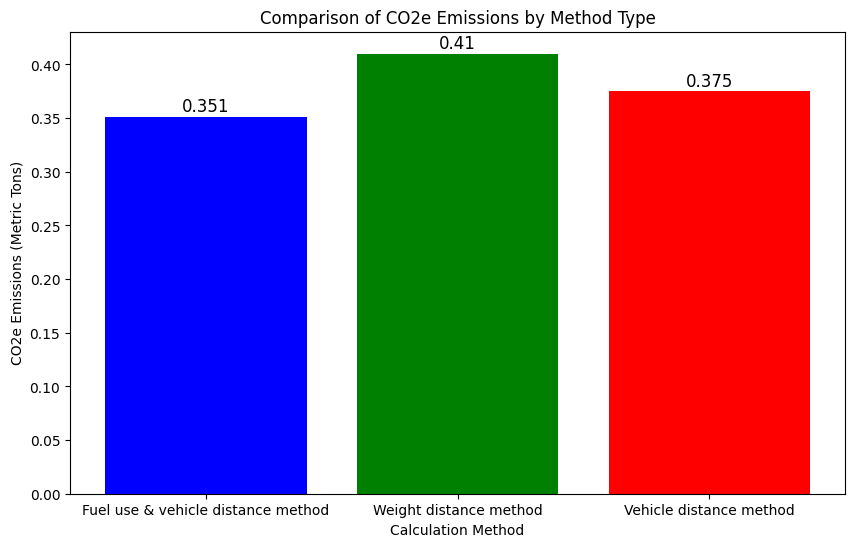

In [21]:

import matplotlib.pyplot as plt

method_type = ['Fuel use & vehicle distance method', 'Weight distance method', 'Vehicle distance method']
N = len(method_type)

co2e_values = [round(CO2Response_fuel_use_method['CO2e'] ,3),round(CO2Response_weight_distance_method['CO2e'] ,3),round(CO2Response_vehicle_distance_heavy['CO2e'] ,3)]
plt.figure(figsize=(10,6))
plt.bar(method_type,co2e_values, color=['blue', 'green', 'red'])

plt.xlabel('Calculation Method')
plt.ylabel('CO2e Emissions (Metric Tons)')
plt.title('Comparison of CO2e Emissions by Method Type')

for i,v in enumerate(co2e_values):
    plt.text(i, v+ 0.005, str(v), ha='center', fontsize=12)

plt.show()


![freight_transport_decision_tree.png](freight_transport_decision_tree.png)

Using the decision tree above, the correct calculation method for the freight transport can be chosen.